# Title: <span style='color:red;'>US GUN VIOLENCE  ANALYSIS</span>
Gun violence is a public health epidemic in the United States. Gun violence in the United States
results in tens of thousands of deaths and injuries annually. According to  the Center for Dieses
Control (CDC’s) National Center for Health Statistics reports that gun deaths  reached their highest 
level since 1968 in 2017
<center><img src="image/gun.jpg"  width="700" height = "350"></center>



# Project Description 
This project is to explore the US gun violence dataset to gain insights and meanings to one the of problems facing 
the United States.<br>  This projects allows the use of statistical summaries as well as visualizations with a preferred software or tool for data analysis thereby <br> exposing the trainee to a variety of methods applied in data analysis. 
By the end of this project work, the trainee will gain in-depth in <br> the area of Exploratory Data Analysis.


# Dataset Description:
The dataset used in this project was obtained from [source](https://www.kaggle.com/jameslko/gun-violence-data)<br>
The dataset contains information about gun related cases in the United States. The data was collected between
the years 2013 to 2018.<br>  However, analysis focused on the years 2014 to 2017 since 2013 and 2018 had missing and incomplete data respectively

# Goal:
<span style='color:red;'>State a clear goal of what you want to achieve by the end of this project here</span><br>
The goals of this analysis is to find;
* The state with the most number of gun related incidents
* The state with the most number of gun related fatality
* The state with the most number of gun rlated casualty
* The gun related cases over the years 2014 to 2017
* The month in the year with the most number of gun related incidents
* The day in the week with the most number of gun related cases



# DATA ANALYSIS BEGINS
### Importation of libraries

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import calendar

In [2]:
# load data
file = './data/guns.csv'
df = pd.read_csv(file)


### Part I: Data quality Assessment
**Goal**:
To perform an initial assessment of the data quality that would allow us to go to the next steps of our analyses. Use this section to write any code you deem necesary for completing your inspection of the dataset. Once completed, leave your report in the Data Quality Report Document

To complete this step, it is suggested for you to examine the dataset for one or more of the following data quality issues:
- Accuracy of field values
- Missing values
- Duplicate entries

## Duplicates
There are no diplicates as far as the criteria used for checking is concerned.
The criteria for checking the duplicates was based on the incident_id. 

In [92]:
print('Before ',df.shape[0])
df.drop_duplicates(subset=['incident_id'], keep='last',inplace=True)
print('After ',df.shape[0])

Before  239677
After  239677


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   n_killed                     239677 non-null  int64  
 5   n_injured                    239677 non-null  int64  
 6   incident_url                 239677 non-null  object 
 7   source_url                   239209 non-null  object 
 8   incident_url_fields_missing  239677 non-null  bool   
 9   congressional_district       227733 non-null  float64
 10  gun_stolen                   140179 non-null  object 
 11  gun_type                     140226 non-null  object 
 12  latitude                     231754 non-null  float64
 13 

## Missing data

In [5]:
df.isna().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_relationship       223903
participant_status              27626
participant_type                24863
sources                           609
dtype: int64

# Part II: Data Cleaning & Preprocessing

Based on the data quality assessment you carried out above, perform any preliminary cleaning on your data that you need in order to carry out with your exploration of the dataset


## Comment
The data does not have any duplicates and the columns with the missing values will not be used in my analysis. <br>
Hence, I proceed with my analysis by slicing the needed part of the dataset

In [102]:
df1=pd.DataFrame(df[['incident_id', 'date', 'state', 'city_or_county', 'n_killed','n_injured',
        'latitude','longitude','n_guns_involved','gun_type']])
df1.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,gun_type
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559,NaN,NaN
1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330,NaN,NaN
2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377,2.0,0::Unknown||1::Unknown
3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020,NaN,NaN
4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569,2.0,0::Handgun||1::Handgun


# Splitting the date into day, month, year, weekday

In [103]:
df1['day'] = pd.DatetimeIndex(df1['date']).strftime("%A")
df1['month'] = pd.DatetimeIndex(df1['date']).month#strftime("%B")
df1['month_name'] = pd.DatetimeIndex(df1['date']).strftime("%B")
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['day_of_week'] = pd.DatetimeIndex(df1['date']).weekday

df1.head()


,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,gun_type,day,month,month_name,year,day_of_week
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559,NaN,NaN,Tuesday,1,January,2013,1
1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330,NaN,NaN,Tuesday,1,January,2013,1
2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377,2.0,0::Unknown||1::Unknown,Tuesday,1,January,2013,1
3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020,NaN,NaN,Saturday,1,January,2013,5
4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569,2.0,0::Handgun||1::Handgun,Monday,1,January,2013,0


# Part III: Analysis & Visualization
Based on the stated goals at the beginining of this analysis, perform any set of anylysis of your data to obtain insights that can hel you arrive at some plausible conclusions.

Summarize your findings in a short presentation using the powerpoint tamplate included in the project folder

### Distribution of data over the years
Taking a look at the dataset according to the years the data was collected.<br>
It is observed that 2013 and 2018 contains extremely low cases count that will affect the analysis. <br>
Hence the analysis is focused on the period of 2014 to 2017

In [113]:
df_years=pd.DataFrame(df1['incident_id'].groupby(df1['year']).count())
df_years.reset_index(inplace=True)
df_years.rename(columns={'incident_id':'No. of incidents'},inplace=True)
df_years

,year,No. of incidents
0,2013,278
1,2014,51854
2,2015,53579
3,2016,58763
4,2017,61401
5,2018,13802


## Filtering out data from 2014 to 2017


In [125]:
df1=df1[(df1['year']!=2013)&(df1['year']!=2018)]
df1.head()


,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,gun_type,day,month,month_name,year,day_of_week
278,95289,1/1/2014,Michigan,Muskegon,0,0,43.2301,-86.2514,NaN,NaN,Wednesday,1,January,2014,2
279,92401,1/1/2014,New Jersey,Newark,0,0,40.7417,-74.1695,NaN,NaN,Wednesday,1,January,2014,2
280,92383,1/1/2014,New York,Queens,1,0,40.7034,-73.7474,NaN,NaN,Wednesday,1,January,2014,2
281,92142,1/1/2014,New York,Brooklyn,0,1,40.6715,-73.9476,NaN,NaN,Wednesday,1,January,2014,2
282,95261,1/1/2014,Missouri,Springfield,0,1,37.2646,-93.3007,NaN,NaN,Wednesday,1,January,2014,2


## Location Related Trend
In this section, it was established that,<br>
* Illinois is the state with the most number of cases related to gun violence.
* Clifornia has the most number of gun related deaths recorded.
* Illinois leads interms of the casualty counts
* Even though the Arizona recorded low number of cases (2177) yet the casualty rate is quite high (0.97).

# Statewise analysis (deaths, injuries, cases etc)

In [132]:
# State cases
state_cases=pd.DataFrame(df1[['state']].groupby(df1['state']).count())#.sort_values('', ascending=False))
state_cases.rename(columns={'state':'No. of cases'},inplace='True')#.sort_values('state',ascending=False)
state_cases.reset_index(inplace=True)
state_cases['Mean No. of cases']=state_cases['No. of cases']/4
state_cases

#State Kills
state_kill=pd.DataFrame(df1[['n_killed','n_injured']].groupby(df1['state']).sum())
#.sort_values('n_killed', ascending=False))
state_kill.reset_index(inplace=True)



df_state=pd.merge(state_cases,state_kill,how='inner')
df_state['No. of casualties']=df_state['n_killed']+df_state['n_injured']
df_state['casualty_rate']=df_state['No. of casualties']/df_state['No. of cases']
df_state['death_rate']=df_state['n_killed']/df_state['No. of cases']

df_state['injury_rate']=df_state['n_injured']/df_state['No. of cases']
#df_state['Mean No. of cases']=df_state['No. of cases']/6
df_state.sort_values('No. of cases',ascending=False,inplace=True)
df_state

# Number of incidents per state

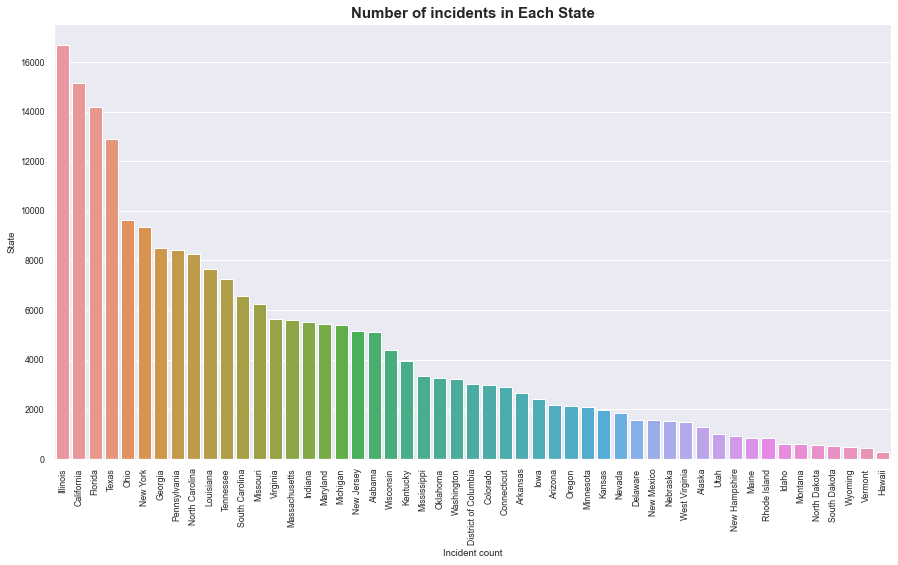

In [115]:
x_axis,y_axis=df_state.state,df_state['No. of cases']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of incidents in Each State",weight='bold').set_fontsize('15')
plt.xlabel('Incident count')
plt.ylabel('State')
sns.set(font_scale=0.8) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Number of deaths per state

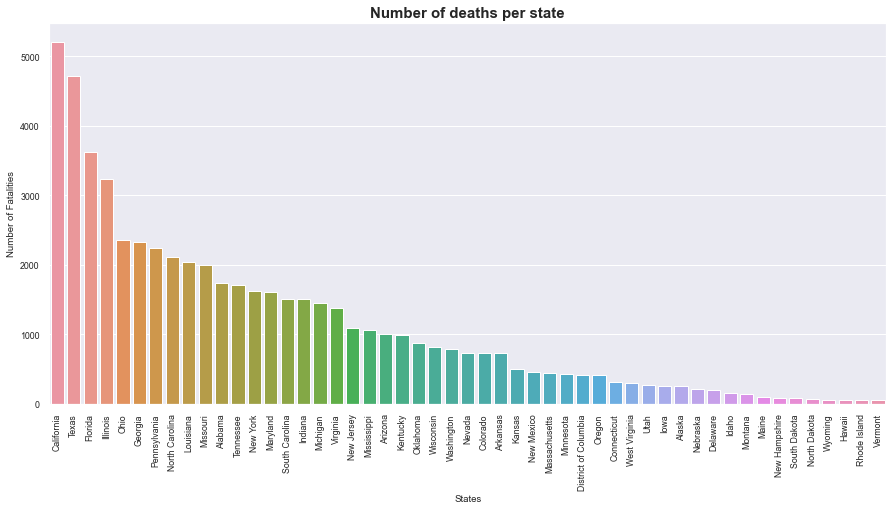

In [116]:
df_state1=df_state.copy()
df_state1.sort_values('n_killed',ascending=False,inplace=True)
x_axis,y_axis=df_state1.state,df_state1['n_killed']
plt.figure(figsize=(15,7))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of deaths per state",weight='bold').set_fontsize('15')
plt.xlabel('States')
plt.ylabel('Number of Fatalities')
sns.set(font_scale=0.8) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Number of injuries per state

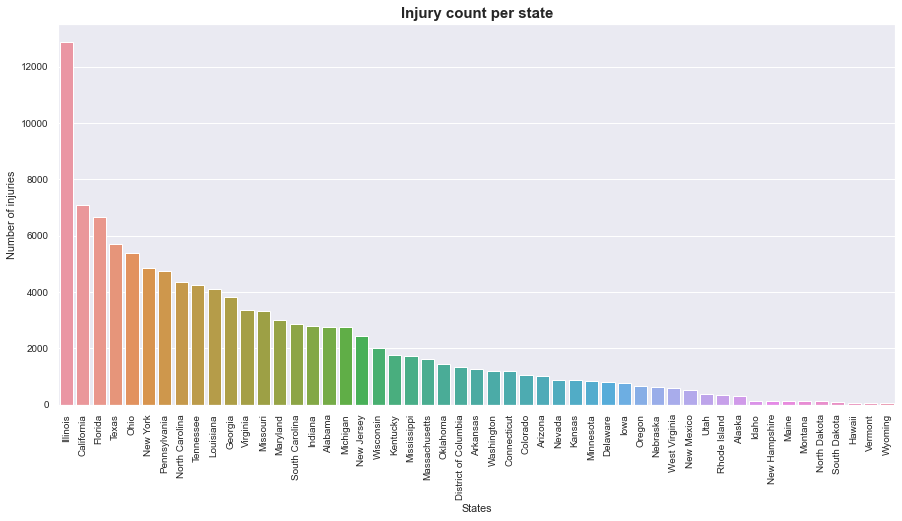

In [118]:
df_state2=df_state.copy()
df_state2.sort_values('n_injured',ascending=False,inplace=True)
#df_state2
x_axis,y_axis=df_state2.state,df_state2['n_injured']
plt.figure(figsize=(15,7))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Injury count per state",weight='bold').set_fontsize('15')
plt.xlabel('States')
plt.ylabel('Number of injuries')
sns.set(font_scale=0.9) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Number of Casualties

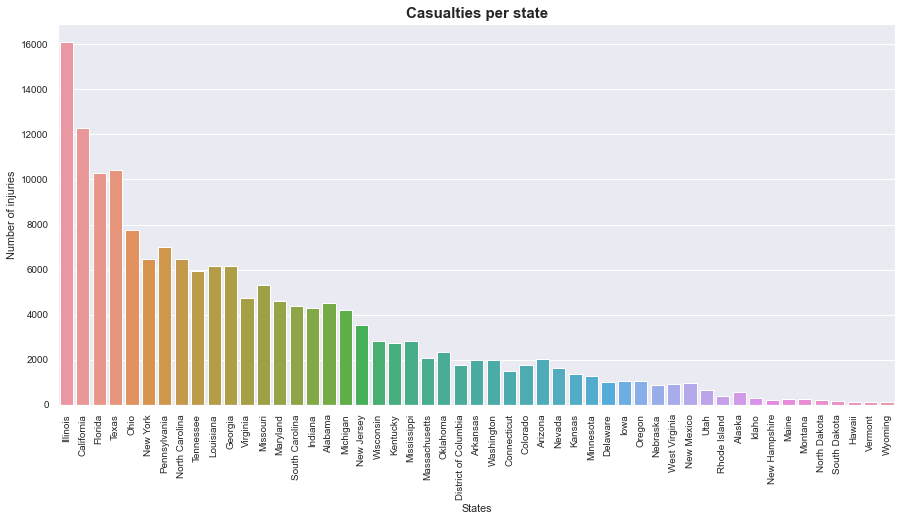

In [119]:
df_state3=df_state.copy()
df_state3.sort_values('n_injured',ascending=False,inplace=True)
#df_state2
x_axis,y_axis=df_state3.state,df_state3['No. of casualties']
plt.figure(figsize=(15,7))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Casualties per state",weight='bold').set_fontsize('15')
plt.xlabel('States')
plt.ylabel('Number of injuries')
sns.set(font_scale=0.9) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Casualty rate plot

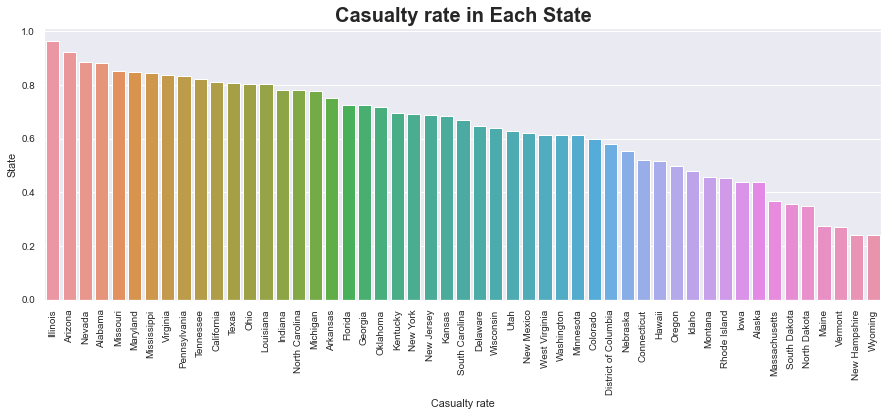

In [120]:
df_state_death_rate=df_state.copy()
df_state_death_rate.sort_values('casualty_rate',ascending=False,inplace=True)
x_axis,y_axis=df_state_death_rate.state,df_state_death_rate['casualty_rate']
plt.figure(figsize=(15,5))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Casualty rate in Each State",weight='bold').set_fontsize('20')
plt.xlabel('Casualty rate')
plt.ylabel('State')
sns.set(font_scale=0.8) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Time Related Analysis
It was established that,
* 2017 had the most number of gun related cases, death count, injury count as well as casualty count
* Sunday is the day with most of the gun related cases recorded
* The moth of July has the most number of cases as well as the number of casualties in relation to gun

# Yearwise analysis (deaths, injuries, cases etc)

In [127]:
# Year cases
year_case=pd.DataFrame(df1['state'].groupby(df1['year']).count())#.sort_values('year', ascending=False))
year_case.reset_index(inplace=True)
year_case.rename(columns={'state':'No. of cases'},inplace=True)


#Year kill
year_kill=pd.DataFrame(df1[['n_killed','n_injured']].groupby(df1['year']).sum().sort_values('year', ascending=True))
year_kill.reset_index(inplace=True)

year_kill



finale=pd.merge(year_case,year_kill,how='inner')
finale['death_rate']=finale['n_killed']/finale['No. of cases']
finale['injury_rate']=finale['n_injured']/finale['No. of cases']
finale['No. of casualities']=finale['n_injured']+finale['n_killed']
finale['casuality rate']=finale['No. of casualities']/finale['No. of cases']
finale



,year,No. of cases,n_killed,n_injured,death_rate,injury_rate,No. of casualities,casuality rate
0,2014,51854,12557,23002,0.242161,0.443592,35559,0.685752
1,2015,53579,13484,26967,0.251666,0.503313,40451,0.754979
2,2016,58763,15066,30580,0.256386,0.520395,45646,0.776781
3,2017,61401,15511,30703,0.252618,0.500041,46214,0.752659


## Casualty, fatalities and injury counts per year

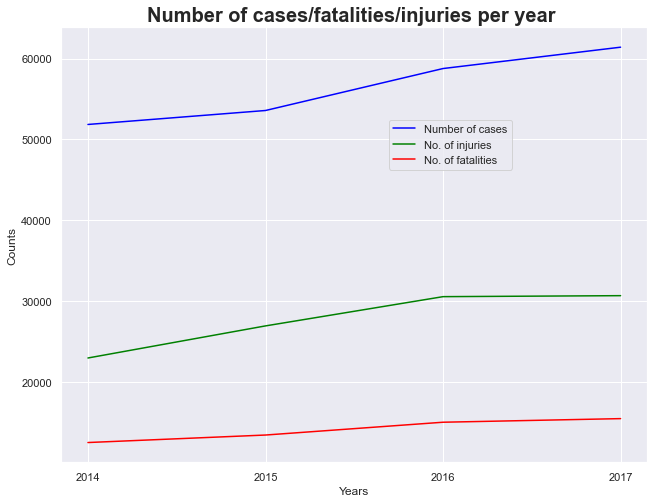

In [133]:
x_axis,y_axis,ex1,ex2=finale.year,finale['No. of cases'],finale.n_killed,finale.n_injured
plt.figure(figsize=(10.5,8))

sns.lineplot(x_axis,y_axis,color='blue')
sns.lineplot(x_axis,ex2,color='green')
sns.lineplot(x_axis,ex1,color='red')


plt.xticks(range(2014,2018))
plt.title("Number of cases/fatalities/injuries per year ",weight='bold').set_fontsize('20')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.legend(['Number of cases', 'No. of injuries','No. of fatalities'],bbox_to_anchor=(0.55, .8),loc=2)

sns.set(font_scale=1) 

plt.show()


# Casualty rate, fatality rate and injury rate per year

In [134]:
rates=pd.DataFrame(df1[['n_killed','n_injured']].groupby(df1['year']).mean().sort_values('year', ascending=True))
#rates=pd.DataFrame(df1['n_injured','n_killed'].groupby(df1['year']).mean())
rates.reset_index(inplace=True)
rates.rename(columns={'n_injured':'injury_rate','n_killed':'fatality_rate'},inplace=True)
rates['casualty_rate']=rates['injury_rate']+rates['fatality_rate']

rates

,year,fatality_rate,injury_rate,casualty_rate
0,2014,0.242161,0.443592,0.685752
1,2015,0.251666,0.503313,0.754979
2,2016,0.256386,0.520395,0.776781
3,2017,0.252618,0.500041,0.752659


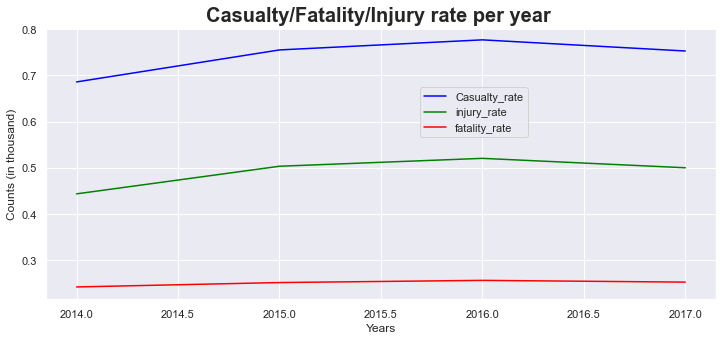

In [135]:
x_axis,y_axis,ex1,ex2=rates.year,rates['casualty_rate'],rates.injury_rate,rates.fatality_rate
plt.figure(figsize=(12,5))

sns.lineplot(x_axis,y_axis,color='blue')


sns.lineplot(x_axis,ex1,color='green')


sns.lineplot(x_axis,ex2,color='red')





plt.title("Casualty/Fatality/Injury rate per year ",weight='bold').set_fontsize('20')
plt.xlabel('Years')
plt.ylabel('Counts (in thousand)')
plt.legend(['Casualty_rate', 'injury_rate','fatality_rate'],bbox_to_anchor=(0.55, .8),loc=2)

sns.set(font_scale=1) 

plt.show()



# Number of incidents per month

In [136]:
month_casualty=pd.DataFrame(df1[['n_injured','n_killed']].groupby(df1['month']).mean())#.sort_values('year', ascending=False))
month_casualty.reset_index(inplace=True)
month_casualty.rename(columns={'n_injured':'Mean_injuries','n_killed':'Mean_fatalities'},inplace=True)


month_cases=pd.DataFrame(df1['state'].groupby(df1['month']).count())
month_cases.reset_index(inplace=True)
month_cases.rename(columns={'state':'No. of cases'},inplace=True)

month_cases1=pd.DataFrame(df1['state'].groupby(df1['month_name']).count())
month_cases1.reset_index(inplace=True)
month_cases1.rename(columns={'state':'No. of cases'},inplace=True)

df_month=pd.merge(month_cases,month_casualty,how='inner')


df_month=pd.merge(df_month,month_cases1,how='inner')


df_month['Mean_casualties']=df_month['Mean_fatalities'] + df_month['Mean_injuries']
df_month['Mean No. of cases']=df_month['No. of cases']/4

df_month


,month,No. of cases,Mean_injuries,Mean_fatalities,month_name,Mean_casualties,Mean No. of cases
0,1,18150,0.470358,0.258292,January,0.728650,4537.50
1,2,14705,0.453043,0.261136,February,0.714179,3676.25
2,3,17869,0.464883,0.251721,March,0.716604,4467.25
3,4,18611,0.475794,0.234109,April,0.709903,4652.75
4,5,19903,0.509622,0.241672,May,0.751294,4975.75
5,6,18724,0.516236,0.259613,June,0.775849,4681.00
6,7,21092,0.528542,0.248672,July,0.777214,5273.00
7,8,21012,0.510423,0.242338,August,0.752760,5253.00
8,9,19628,0.491950,0.241594,September,0.733544,4907.00
9,10,19868,0.486964,0.239833,October,0.726797,4967.00


# Mean Casualty, fatality and injury plot

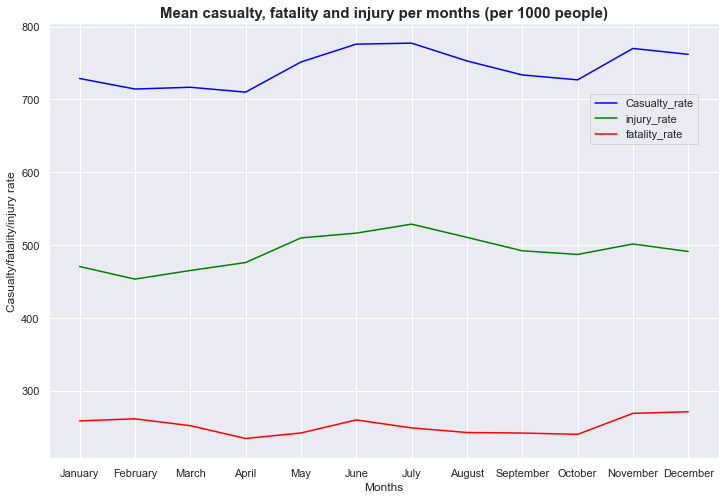

In [137]:
x_axis,y_axis=df_month['month_name'],df_month['Mean_fatalities']*1000
plt.figure(figsize=(12,8))
#sns.distplot(x_axis)

sns.lineplot(x_axis,(df_month['Mean_casualties']*1000),sort=False,color='blue')
sns.lineplot(x_axis,(df_month['Mean_injuries']*1000),sort=False,color='green')
sns.lineplot(x_axis,y_axis,sort=False,color='red')

#fig=rr.plot(x_axis,y_axis)
plt.title("Mean casualty, fatality and injury per months (per 1000 people)",weight='bold').set_fontsize('15')
plt.xlabel('Months')
plt.ylabel('Casualty/fatality/injury rate')
plt.legend(['Casualty_rate', 'injury_rate','fatality_rate'],bbox_to_anchor=(0.8, .85),loc=2)
sns.set(font_scale=1) 
#fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

# Weekday Analysis

In [138]:
week_casualty=pd.DataFrame(df1[['n_injured','n_killed']].groupby(df1['day']).mean())#.sort_values('year', ascending=False))
week_casualty.reset_index(inplace=True)
week_casualty.rename(columns={'n_injured':'Mean_injuries','n_killed':'Mean_fatalities'},inplace=True)


week_cases=pd.DataFrame(df1['state'].groupby(df1['day']).count())
week_cases.reset_index(inplace=True)
week_cases.rename(columns={'state':'No. of cases'},inplace=True)

week_cases1=pd.DataFrame(df1['state'].groupby(df1['day_of_week']).count())
week_cases1.reset_index(inplace=True)
week_cases1.rename(columns={'state':'No. of cases'},inplace=True)

df_week=pd.merge(week_cases,week_casualty,how='inner')


df_week=pd.merge(df_week,week_cases1,how='inner')


df_week['Mean_casualties']=df_week['Mean_fatalities'] + df_week['Mean_injuries']
df_week['Mean No. of cases']=df_week['No. of cases']/208

df_week.sort_values('day_of_week',ascending=True,inplace=True)
df_week.set_index('day',inplace=True)
df_week


,No. of cases,Mean_injuries,Mean_fatalities,day_of_week,Mean_casualties,Mean No. of cases
day,,,,,,
Monday,31674,0.478721,0.246606,0,0.725327,152.278846
Tuesday,31381,0.454861,0.236704,1,0.691565,150.870192
Wednesday,32108,0.446057,0.235580,2,0.681637,154.365385
Thursday,30541,0.443240,0.236665,3,0.679906,146.831731
Friday,30867,0.466323,0.253280,4,0.719603,148.399038
Saturday,33985,0.567250,0.269295,5,0.836546,163.389423
Sunday,35041,0.578865,0.274450,6,0.853315,168.466346


# Mean casualty, injuries and fatalities per weekday

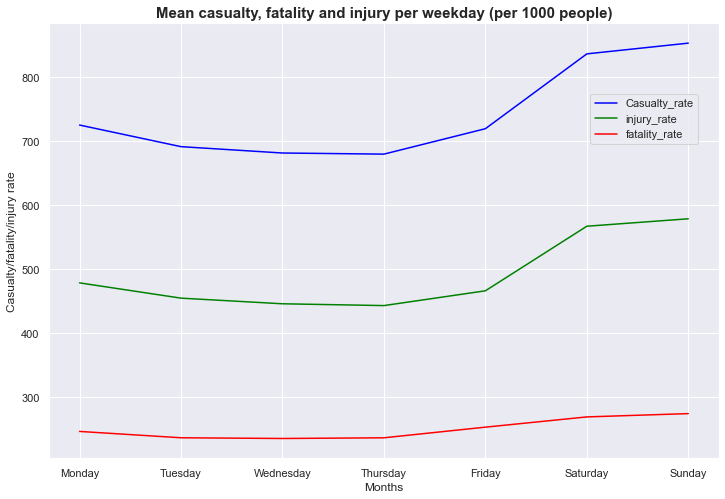

In [139]:
x_axis,y_axis=df_week.index,df_week['Mean_fatalities']*1000
plt.figure(figsize=(12,8))
#sns.distplot(x_axis)

sns.lineplot(x_axis,(df_week['Mean_casualties']*1000),sort=False,color='blue')
sns.lineplot(x_axis,(df_week['Mean_injuries']*1000),sort=False,color='green')
sns.lineplot(x_axis,y_axis,sort=False,color='red')

#fig=rr.plot(x_axis,y_axis)
plt.title("Mean casualty, fatality and injury per weekday (per 1000 people)",weight='bold').set_fontsize('15')
plt.xlabel('Months')
plt.ylabel('Casualty/fatality/injury rate')
plt.legend(['Casualty_rate', 'injury_rate','fatality_rate'],bbox_to_anchor=(0.8, .85),loc=2)
sns.set(font_scale=1) 
#fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

## Conclusion
In this project, an exploratory data analysis was conducted on the US gun violence dataset.<br>
Statistical summaries as well as visualizations are generated to gain insigth into the <br>
dataset. Some of the findings are,
* Illinois is most dangerous state in terms of the number cases related to gun violence recording  16695-gun related cases.
* California  is the state with the maximum number of fatalities relating to gun cases, recording 5212 deaths.
* The highest number of cases and casualty counts were recorded in the year 2017 with 61401 cases and 46214 casualties respectively.
* Majority of the gun related incidents and fatalities were recorded in the month of July. There were a total of 21092 cases and 5245 fatalities in the month of July.
* Majority of the gun related incidents and fatalities were recorded Sundays.  There were a total of 35041vcases and 9617 fatalities in the month of July.

### References
* https://www.kaggle.com/eze2094/gun-violence-data-exploring-analysis-plot-model 
* https://nij.ojp.gov/topics/crime/violent-crime/gun-violence 

